In [2]:
import os
import glob
from matplotlib import pyplot as plt
import re
import numpy as np

In [3]:
path = r'C:\Users\parkf\Desktop\summer2021\htcBasic2'

subjectList = []
ridgeVec = []
memVec = []
foldVec = []

for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    if int(fileNum) not in subjectList:
        subjectList.append(int(fileNum))
    if int(memNum) not in memVec:
        memVec.append(int(memNum))
    if float(ridgeNum) not in ridgeVec:
        ridgeVec.append(float(ridgeNum))
    if int(foldNum) not in foldVec:
        foldVec.append(int(foldNum))

err = np.zeros((len(subjectList), len(memVec), len(ridgeVec), len(foldVec)))
for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    f = open(filename,"r")
    error = (float(f.read()))
    err[subjectList.index(int(fileNum)), memVec.index(int(memNum)), ridgeVec.index(float(ridgeNum)), int(foldNum)] = error
      
            
errNoCv = np.mean(err,3)
    

In [4]:
print(subjectList)
print(memVec)
print(ridgeVec)

[282, 335, 439, 524]
[12, 16, 20, 24, 28, 4, 8]
[0.1, 0.5]


In [5]:
print(errNoCv.shape)
print(err.shape)
print(err)
print(errNoCv)

(4, 7, 2)
(4, 7, 2, 10)
[[[[0.00752502 0.00752502 0.00752502 0.00752502 0.00752502 0.00752502
    0.00752502 0.00752502 0.00752502 0.00752502]
   [0.00756911 0.00756911 0.00756911 0.00756911 0.00756911 0.00756911
    0.00756911 0.00756911 0.00756911 0.00756911]]

  [[0.00751707 0.00751707 0.00751707 0.00751707 0.00751707 0.00751707
    0.00751707 0.00751707 0.00751707 0.00751707]
   [0.00756168 0.00756168 0.00756168 0.00756168 0.00756168 0.00756168
    0.00756168 0.00756168 0.00756168 0.00756168]]

  [[0.00751307 0.00751307 0.00751307 0.00751307 0.00751307 0.00751307
    0.00751307 0.00751307 0.00751307 0.00751307]
   [0.00755783 0.00755783 0.00755783 0.00755783 0.00755783 0.00755783
    0.00755783 0.00755783 0.00755783 0.00755783]]

  [[0.00751001 0.00751001 0.00751001 0.00751001 0.00751001 0.00751001
    0.00751001 0.00751001 0.00751001 0.00751001]
   [0.00755446 0.00755446 0.00755446 0.00755446 0.00755446 0.00755446
    0.00755446 0.00755446 0.00755446 0.00755446]]

  [[0.00750307 0

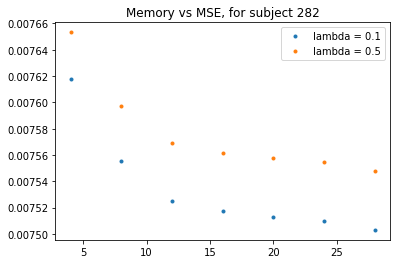

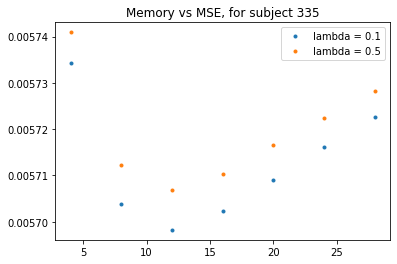

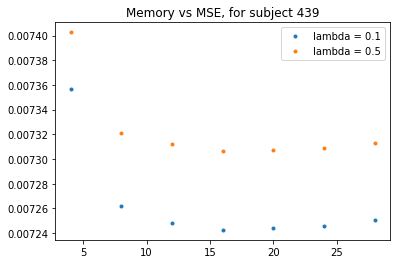

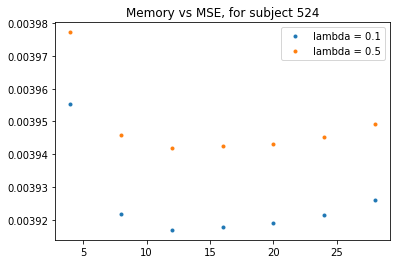

In [6]:
for n in range(len(subjectList)):
    titleString = f"Memory vs MSE, for subject {subjectList[n]}"
    plt.title(titleString)
    for i in range(len(ridgeVec)):
        plt.plot(memVec[:], errNoCv[n , :, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    plt.legend()
    plt.show()

In [7]:
from scipy.io import loadmat

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [8]:
# r value is residual sum of squares/total sum of squares,
# should be equivalent ot MSE/variance of data
path = r'C:\Users\parkf\Desktop\summer2021\eegData\displayStat'
for filename in glob.glob(os.path.join(path, '*.mat')):
    raw = loadmat(filename)
    X = raw['data']
    l = X.shape[0]
    c = X.shape[1]
    print(X.var())

for filename in glob.glob(os.path.join(path, '*.mat')):
    raw = loadmat(filename)
    X = raw['data']
    print('value of l', X.shape[0]) #l is what we scale lambda by in some of the runs
    mask = raw['mask']
    print(f'for file {filename}')
    for memNumber in [4, 8, 12, 16, 20]:
        featureMat = functionList.buildFeatureMat(X,memNumber)
        featureMat = functionList.removeTrash(featureMat,mask,memNumber)
        print(np.trace(np.transpose(featureMat)@featureMat)*.0001)

697.0379733948392
1114.2208336565557
14465.088373485969
35704.4534432327
amount of points 169870
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\282L.mat
1026025.1048463641
2049733.2217560501
3071382.9924411667
4091160.439543395
5108945.671155275
amount of points 151499
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\335B.mat
4683577.624146086
9352363.065590896
14006734.029991766
18647063.252956305
23273627.205149945
amount of points 156224
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\439B.mat
28270993.391808804
56481027.24742571
84632184.2734888
112725780.80529271
140764222.54143864
amount of points 150976
for file C:\Users\parkf\Desktop\summer2021\eegData\displayStat\524R.mat
176718539.248048
353297030.4483561
529737523.1477866
706051306.0960099
882241308.004954
